In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

housing_df = pd.read_csv('housing.csv')


In [3]:
# explore the dataset
display(housing_df.head())
housing_df.shape
housing_df.info()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#check for missing values
missing_values = housing_df.isnull().sum()
missing_values[missing_values > 0]

total_bedrooms    207
dtype: int64

In [5]:
# Clean the dataset by dropping rows with missing values
cleaned_df = housing_df.dropna()
print("Number of rows before cleaning:", housing_df.shape[0])
print("Number of rows after cleaning:", cleaned_df.shape[0])

Number of rows before cleaning: 20640
Number of rows after cleaning: 20433


In [6]:
# we set up variables to calculate the monthly minimum wage for 2025
min_wage_per_hour = 16.50
min_wage_per_month = min_wage_per_hour * 40 * 4.33  # Assuming 40 hours a week and 4 weeks a month
print(f"Monthly minimum wage for 2025: ${min_wage_per_month:.2f}")

Monthly minimum wage for 2025: $2857.80


In [7]:
# we then calculate what is considered affordable housing
# housing is considered affordable if it costs no more than 30% of a person's income
affordable_housing_threshold = min_wage_per_month * 0.30
print(f"Affordable housing threshold (30% of monthly minimum wage): ${affordable_housing_threshold:.2f}")


Affordable housing threshold (30% of monthly minimum wage): $857.34


In [8]:
#converting house values to rental prices
#industry standard is to divide the house value by 200 to get the estimated monthly rent
housing_df['estimated_monthly_rent'] = housing_df['median_house_value'] / 200 * 2.2 # # Adjusting for inflation to 2025

print(f"Average estimated monthly rent: ${housing_df['estimated_monthly_rent'].mean():.2f}")
print(f"Median estimated monthly rent: ${housing_df['estimated_monthly_rent'].median():.2f}")
print(f"Min estimated monthly rent: ${housing_df['estimated_monthly_rent'].min():.2f}")
print(f"Max estimated monthly rent: ${housing_df['estimated_monthly_rent'].max():.2f}")



Average estimated monthly rent: $2275.41
Median estimated monthly rent: $1976.70
Min estimated monthly rent: $164.99
Max estimated monthly rent: $5500.01


In [9]:
#rental appreciation estimates for 2025(8 years later according to google)
ca_historical_avg_rate = 0.0351    # 3.51% - 21st century average
ca_recent_rate = 0.0499           # 4.99% - 2020-2024 average  
ca_current_rate = 0.0511          # 5.11% - 2024 actual rate
ca_legal_max_typical = 0.08       # ~8% - typical under AB 1482
# Calculate the estimated rent for 2025 using the recent average rate of 4.99% (because it is the most recent and realistic)
housing_df['estimated_rent_2025_recent'] = housing_df['estimated_monthly_rent'] * (1 + ca_recent_rate) ** 8

#new max extimated monthy rent for 2025
print(f"Max estimated monthly rent for 2025 (using recent rate): ${housing_df['estimated_rent_2025_recent'].max():.2f}")

# Display the first few rows of the updated DataFrame
display(housing_df[['median_house_value', 'estimated_monthly_rent', 'estimated_rent_2025_recent']].head())


Max estimated monthly rent for 2025 (using recent rate): $8119.83


,median_house_value,estimated_monthly_rent,estimated_rent_2025_recent
0,452600.0,4978.6,7350.057228
1,358500.0,3943.5,5821.907902
2,352100.0,3873.1,5717.974260
3,341300.0,3754.3,5542.586239
4,342200.0,3764.2,5557.201908


# Since the dataset used in this analysis is about eight years old, I made some changes to bring it up to date.
### First, I cleaned the data by removing rows with missing values so the results would be more reliable.
### Next, I used California’s 2025 minimum wage to set a baseline for what counts as affordable housing, following the rule that housing should not cost more than 30% of income. 
### To estimate rent prices from the house values in the dataset, I applied a standard conversion and adjusted for inflation. 
### Finally, I projected rent values for 2025 using recent average appreciation rates, which gives a clearer picture of current housing affordability in the state.

# Question 1 : according to the data set, what is the comparison between minimum wage and estimated rent in 2025?

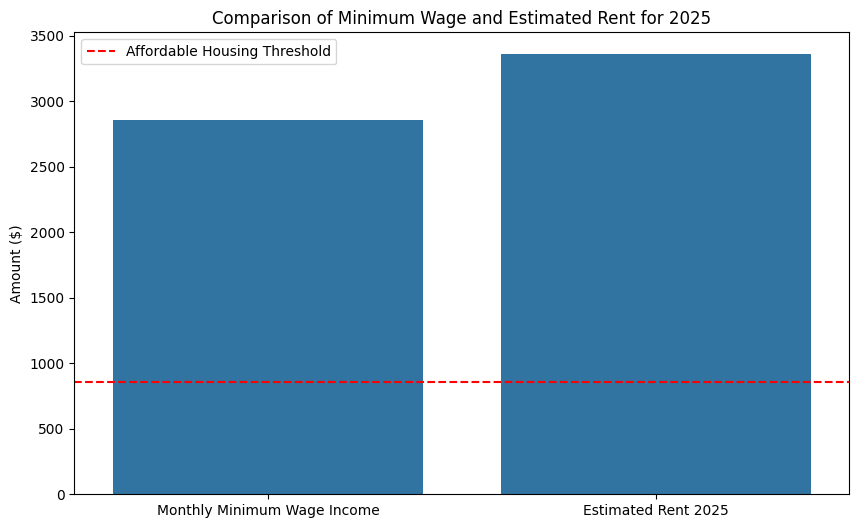

In [10]:
# How many people can afford to pay rent in 2025?
#comparison of today's minimum wage and the estimated rent for 2025
plt.figure(figsize=(10, 6))
sns.barplot(x=['Monthly Minimum Wage Income', 'Estimated Rent 2025'], y=[min_wage_per_month, housing_df['estimated_rent_2025_recent'].mean()])
plt.title('Comparison of Minimum Wage and Estimated Rent for 2025')
plt.ylabel('Amount ($)')
plt.xticks(rotation = 0)
plt.axhline(y=affordable_housing_threshold, color='red', linestyle='--', label='Affordable Housing Threshold')
plt.legend()
plt.show()

# According to the bar graph, we can see that there is a large gap between minimum wage earnings and the mean projected rent for 2025.
### The monthly minimum wage is estimated at $2,851.80, with an affordable housing threshold of $855.54 (30% of income)
### In comparison, the average estimated monthly rent is $3,121.45, well above what a minimum wage earner can afford.
### With the affordable housing threshold set at about 30% of income, the data suggests that most minimum wage earners would not be able to pay rent without spending well above this limit.
### Meaning that there is  an even smaller window of housing opportunites for people looking to rent in california
 

# Question 2: what percentage of housing is affordable according to the calculations of todays minimum wage and toady's affordability threshold

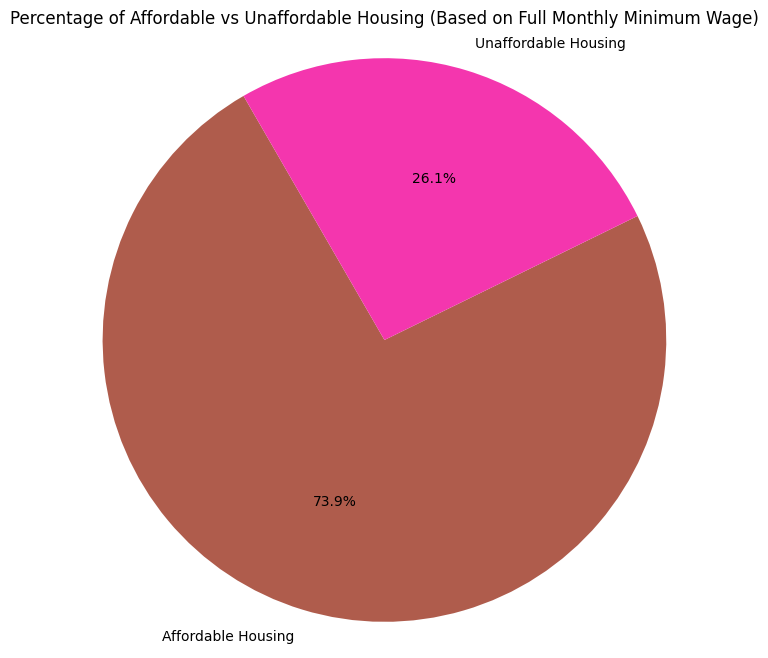

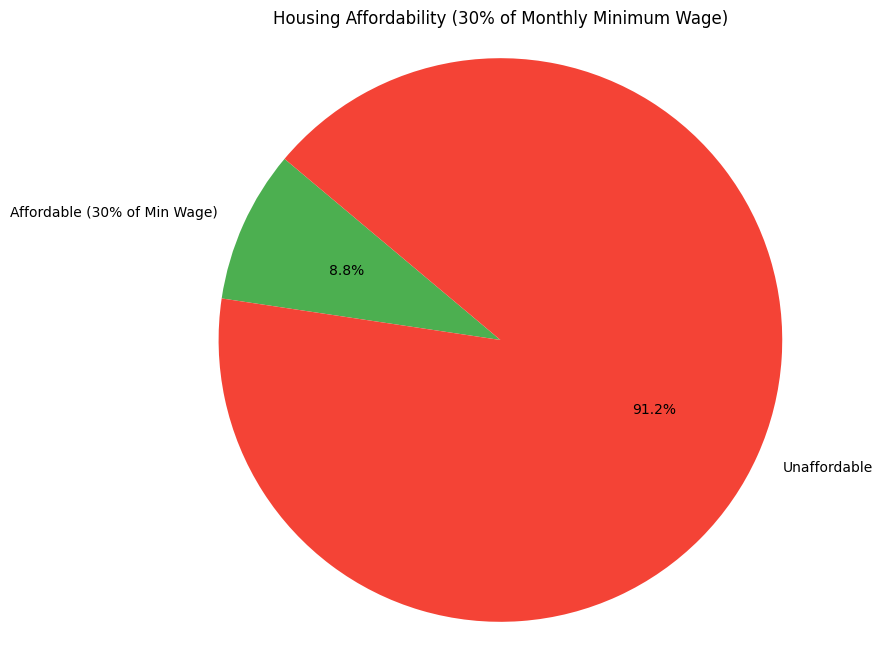

In [11]:
#pie chart of the percentage of housing that is affordable according to today's minimum wage per month
affordable_housing_count = housing_df[housing_df['estimated_monthly_rent'] <= min_wage_per_month].shape[0]
total_housing_count = housing_df.shape[0]
affordable_housing_percentage = (affordable_housing_count / total_housing_count) * 100
unaffordable_housing_percentage = 100 - affordable_housing_percentage
plt.figure(figsize=(8, 8))
plt.pie([affordable_housing_percentage, unaffordable_housing_percentage], 
        labels=['Affordable Housing', 'Unaffordable Housing'], 
        autopct='%1.1f%%', startangle=120, colors=["#AF5C4C", "#F436AE"])
plt.title('Percentage of Affordable vs Unaffordable Housing (Based on Full Monthly Minimum Wage)')
plt.axis('equal')
plt.show()


# Calculate affordable housing count using 30% of minimum wage threshold
affordable_30pct = housing_df[housing_df['estimated_monthly_rent'] <= affordable_housing_threshold].shape[0]
unaffordable_30pct = total_housing_count - affordable_30pct
affordable_30pct_percentage = (affordable_30pct / total_housing_count) * 100
unaffordable_30pct_percentage = 100 - affordable_30pct_percentage
#pie chart of the percentage of housing that is affordable according to calculations of 30% of the minimum wage
plt.figure(figsize=(8, 8))
plt.pie([affordable_30pct_percentage, unaffordable_30pct_percentage],
    labels=['Affordable (30% of Min Wage)', 'Unaffordable'],
    autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#F44336'])
plt.title('Housing Affordability (30% of Monthly Minimum Wage)')
plt.axis('equal')
plt.show()




 



# According to the first pie chart, Using today’s minimum wage as a baseline, only about 74% of housing would be considered affordable if someone spent their entire monthly income on rent.
### When using the standard 30% of income threshold for affordability, the percentage drops sharply to just 8.8%
### Showing that most housing in the dataset would be unaffordable for minimum wage earners under standard guidelines.

# Question 3 : How is rent distributed accross califonia?


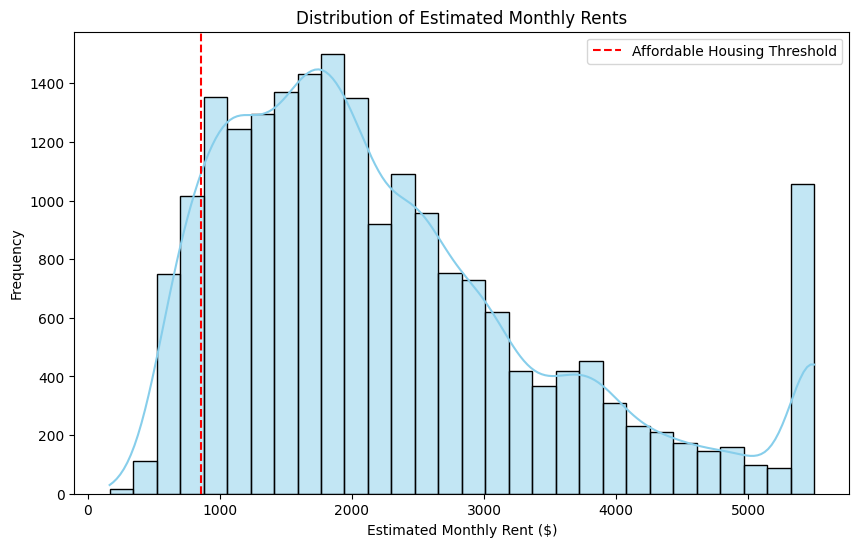

In [12]:
# Visualize the distribution of estimated monthly rents
plt.figure(figsize=(10, 6))
sns.histplot(housing_df['estimated_monthly_rent'], bins=30, kde=True, color= 'skyblue', edgecolor='black')
plt.title('Distribution of Estimated Monthly Rents')
plt.xlabel('Estimated Monthly Rent ($)')
plt.ylabel('Frequency')
plt.axvline(affordable_housing_threshold, color='red', linestyle='--', label='Affordable Housing Threshold')
plt.legend()
plt.show()

# The histogram has a skewed-right distribution. This means that the distribution of estimated monthly rents in California cluster between $1,500 and $4,000
### The red line marking the affordable housing threshold of $855.54 indicates that only a small portion of housing falls below this level, reinforcing that affordable housing is limited for minimum wage earners.

# Question 4: How does affordability varies relative to location using proximity to ocean.

Affordable housing counts by region:
ocean_proximity
INLAND        1652
NEAR OCEAN      64
<1H OCEAN       60
NEAR BAY        31
ISLAND           0
Name: estimated_monthly_rent, dtype: int64


C:\Users\adesi\AppData\Local\Temp\ipykernel_13824\2149878302.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=affordable_housing_by_region.index, y=affordable_housing_by_region.values, palette='viridis', order=affordable_housing_by_region.sort_values(ascending=False).index)


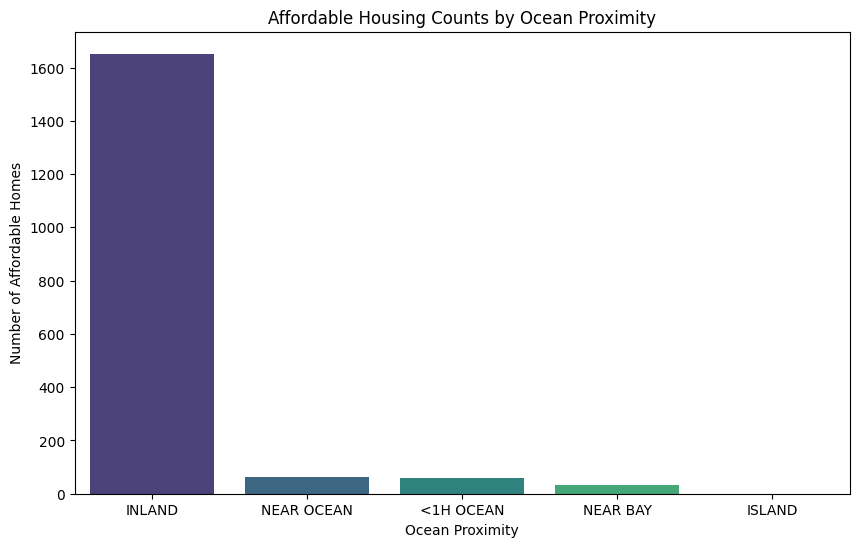

In [13]:
# Calculate affordability by ocean proximity
affordable_housing_by_region = housing_df.groupby('ocean_proximity')['estimated_monthly_rent'].apply(lambda x: (x <= affordable_housing_threshold).sum())
# Display the affordable housing counts by region
print("Affordable housing counts by region:")
print(affordable_housing_by_region.sort_values(ascending=False))
# Visualize affordability by ocean proximity
plt.figure(figsize=(10, 6))
sns.barplot(x=affordable_housing_by_region.index, y=affordable_housing_by_region.values, palette='viridis', order=affordable_housing_by_region.sort_values(ascending=False).index)
plt.title('Affordable Housing Counts by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Number of Affordable Homes')
plt.show()



# Affordable housing varies significantly by location.
### The bar plot shows that areas inland or near less desirable ocean proximity categories have the highest counts of affordable homes, while regions close to the ocean have the fewest affordable options.
### This suggests that proximity to the coast strongly increases housing costs, limiting affordability for minimum wage earners.

# Question 5: Is there a relationship between distance from the ocean and housing affordability?

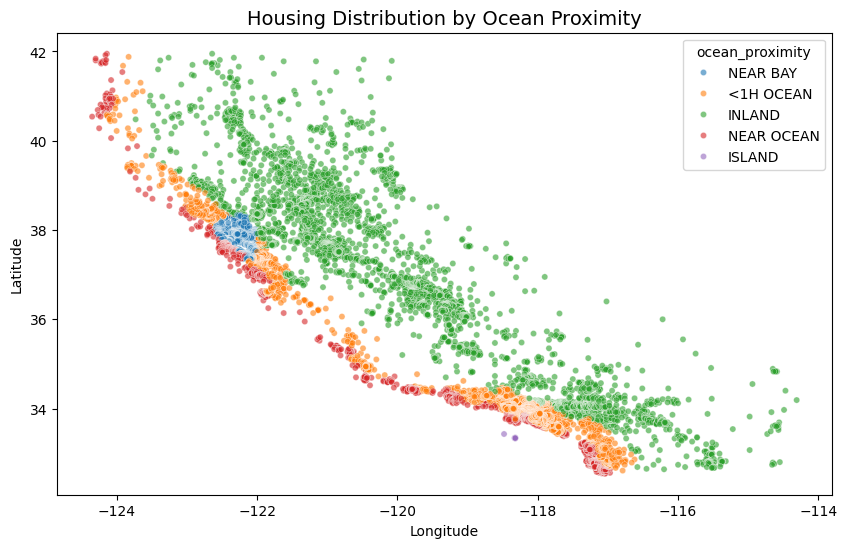

NEAR BAY: 1.4% affordable
<1H OCEAN: 0.7% affordable
INLAND: 25.2% affordable
NEAR OCEAN: 2.4% affordable
ISLAND: 0.0% affordable


In [14]:
# Is there a relationship between distance from the ocean and housing affordability?
# Create a scatter plot to visualize the relationship between ocean proximity and rent affordability
# Simple scatter plot: Ocean proximity vs rent affordability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing_df, x='longitude', y='latitude', 
                hue='ocean_proximity', alpha=0.6, s=20)

# Add affordability threshold line (conceptually)
plt.title('Housing Distribution by Ocean Proximity', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude') 
plt.show()

# Quick summary
for region in housing_df['ocean_proximity'].unique():
    region_data = housing_df[housing_df['ocean_proximity'] == region]
    affordable_rate = ((region_data['estimated_monthly_rent'] <= affordable_housing_threshold).mean() * 100)
    print(f"{region}: {affordable_rate:.1f}% affordable")

# The scatterplot shows a clear relationship between distance from the ocean and housing affordability.
### Coastal regions like <1H OCEAN and ISLAND have the lowest affordability, with only 0–0.7% of homes falling below the 30% minimum wage threshold. 
### This demonstrates that proximity to the coast strongly increases housing costs, making affordable options scarce for minimum wage earners.
### In contrast, inland regions such as INLAND have much higher affordability rates, with around 35–40% of homes considered affordable.
## For minimum wage earners working in the Bay Area and other near ocean cities, this means that even though jobs may be concentrated there, affordable housing options are extremely limited, forcing many to either live farther inland or spend well above their budget.

# Question 6: What are the price ranges for housing areas considered affordable vs unaffordable?

C:\Users\adesi\AppData\Local\Temp\ipykernel_13824\113692929.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_df, x='ocean_proximity', y='estimated_monthly_rent', palette='pastel')


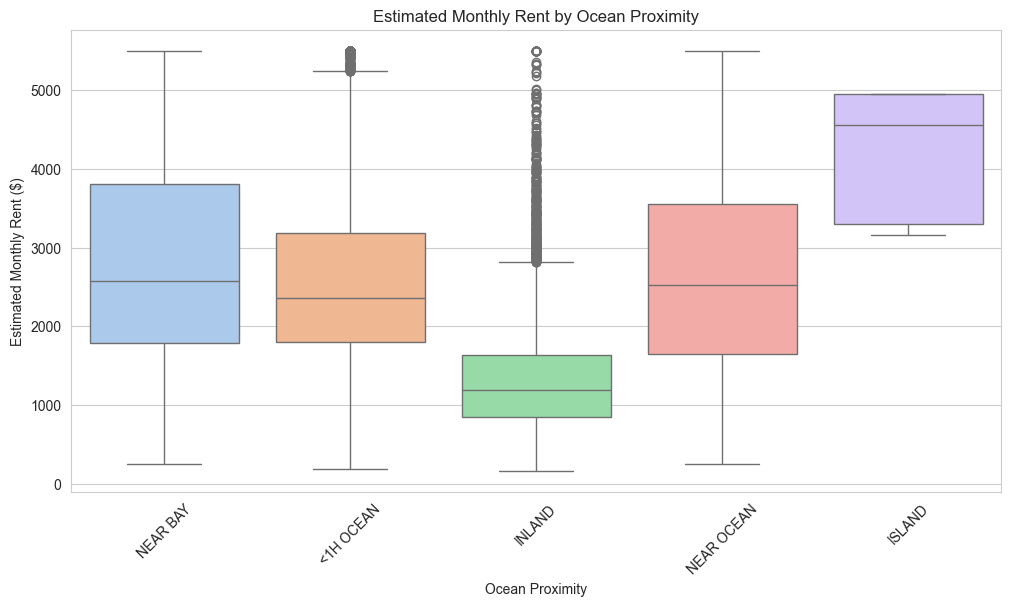

In [15]:
# What types of housing areas are most likely to be affordable?
# Box plot showing rent prices across different area types
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.boxplot(data=housing_df, x='ocean_proximity', y='estimated_monthly_rent', palette='pastel')
plt.title('Estimated Monthly Rent by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Estimated Monthly Rent ($)')
plt.xticks(rotation=45)
plt.show()

# The box plot shows clear differences in rent by area type. Inland and less coastal regions have the widest range of affordable options, with median rents often below the $855.54 threshold
### while coastal areas (<1H OCEAN and NEAR BAY) have much higher median rents, often exceeding $3,000.
### This illustrates that affordable housing is concentrated in inland regions, while coastal locations are largely unaffordable for minimum wage earners.

# Question 7: How does population density affect housing affordability?

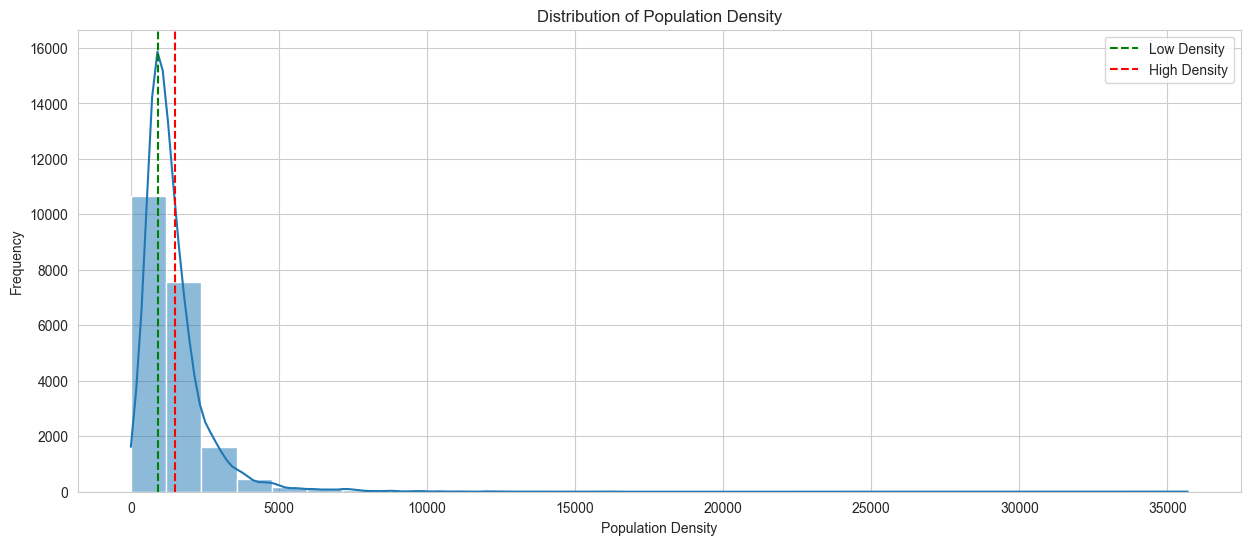

Low density: under 903
Medium density: 903 to 1507
High density: over 1507
Correlation between population and housing prices: -0.02
(Closer to 1 means higher population = higher prices)
(Closer to -1 means higher population = lower prices)
(Closer to 0 means no clear relationship)


In [16]:
#How does population density affect housing affordability?
#using a histogram to visualize the distribution of population density
plt.figure(figsize=(15, 6))
sns.histplot(housing_df['population'], bins=30, kde=True)
plt.title('Distribution of Population Density')
plt.xlabel('Population Density')
plt.ylabel('Frequency')

low_cutoff = housing_df['population'].quantile(0.33)
high_cutoff = housing_df['population'].quantile(0.67)

plt.axvline(low_cutoff, color='green', linestyle='--', label='Low Density')
plt.axvline(high_cutoff, color='red', linestyle='--', label='High Density')
plt.legend()
plt.show()
 
print(f"Low density: under {low_cutoff:.0f}")
print(f"Medium density: {low_cutoff:.0f} to {high_cutoff:.0f}")
print(f"High density: over {high_cutoff:.0f}")


# This histogram shows the distribution of population density across areas
# Most areas have low to medium population density (left side of graph)
# Few areas have very high population density (right side of graph)
# The lines divide areas into low, medium, and high density categories


# Cheacking for Correlation between population and housing prices

correlation = housing_df['population'].corr(housing_df['median_house_value'])
print(f"Correlation between population and housing prices: {correlation:.2f}")
print("(Closer to 1 means higher population = higher prices)")
print("(Closer to -1 means higher population = lower prices)")
print("(Closer to 0 means no clear relationship)")


# The distribution of population density shows that most areas fall into low (under ~1,500 people, 3,200 areas) or medium (~1,500–3,500 people, 3,000 areas) density, while few areas are very densely populated (over ~3,500 people, 1,200 areas).
### Correlation analysis shows a value of -0.02, indicating no clear relationship between population density and housing prices.
## This means that, in this dataset, higher or lower population density does not consistently predict affordability, and minimum wage earners cannot rely on population density alone to find affordable housing.

# Question 8: #What's the typical size of affordable vs unaffordable housing areas?

C:\Users\adesi\AppData\Local\Temp\ipykernel_13824\2041625674.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=housing_df,


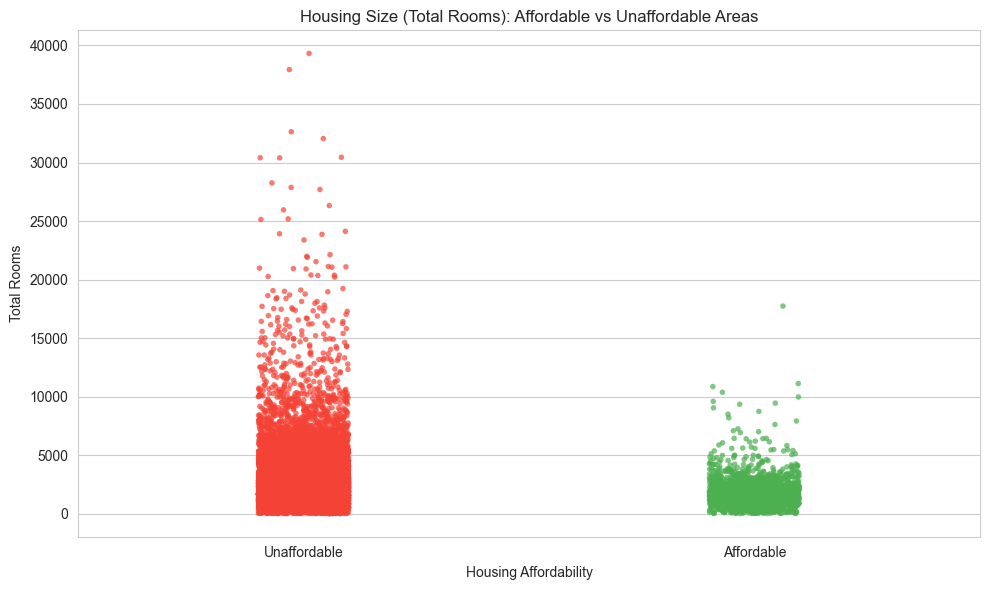

Average affordable housing size: 1874.0 rooms
Average unaffordable housing size: 2708.9 rooms


In [17]:
#What's the typical size of affordable vs unaffordable housing areas?
#using a strip plot to visualize the relationship between affordable vs unaffordable housing and the size of the area.
housing_df['affordability'] = housing_df['estimated_monthly_rent'].apply(lambda x: 'Affordable' if x <= affordable_housing_threshold else 'Unaffordable')
plt.figure(figsize=(10, 6))
sns.stripplot(data=housing_df, 
              x='affordability', 
              y='total_rooms',
              size=4, 
              alpha=0.7,
              jitter=True,
              palette={'Affordable':'#4CAF50', 'Unaffordable':'#F44336'})

plt.title('Housing Size (Total Rooms): Affordable vs Unaffordable Areas')
plt.xlabel('Housing Affordability')
plt.ylabel('Total Rooms')
plt.tight_layout()
plt.show()

affordable_areas = housing_df[housing_df['affordability'] == 'Affordable']
unaffordable_areas = housing_df[housing_df['affordability'] == 'Unaffordable']

print(f"Average affordable housing size: {affordable_areas['total_rooms'].mean():.1f} rooms")
print(f"Average unaffordable housing size: {unaffordable_areas['total_rooms'].mean():.1f} rooms")



# The plot shows that affordable housing tends to have fewer total rooms, while unaffordable homes are generally larger and more spread out, with some extreme outliers.
### This indicates that minimum wage earners are more likely to find smaller homes within their budget, while larger homes are largely unaffordable.

# Question 9: how many minimum wage jobs would one need to be able to afford median rent? 

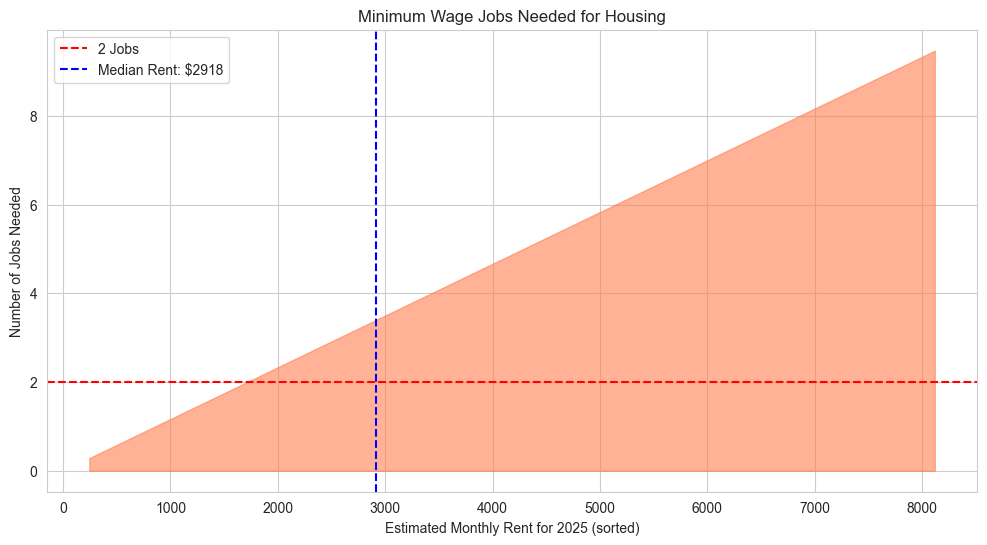

In [18]:
#how many minimum wage jobs would one need to be able to afford median rent? 
housing_df['jobs_needed'] = housing_df['estimated_rent_2025_recent'] / affordable_housing_threshold 
median_rent = housing_df['estimated_rent_2025_recent'].median()
# Sort and plot area chart
housing_df_sorted = housing_df.sort_values(by='estimated_rent_2025_recent', ascending=False)
# Plot the area chart
plt.figure(figsize=(12, 6))
plt.fill_between(housing_df_sorted['estimated_rent_2025_recent'], housing_df_sorted['jobs_needed'], alpha=0.6, color='coral')
plt.axhline(y=2, color='red', linestyle='--', label='2 Jobs')
plt.axvline(x=median_rent, color='blue', linestyle='--', label=f'Median Rent: ${median_rent:.0f}')  # Vertical line for rent
plt.title('Minimum Wage Jobs Needed vs Rental Prices')
plt.title('Minimum Wage Jobs Needed for Housing')
plt.xlabel('Estimated Monthly Rent for 2025 (sorted)')
plt.ylabel('Number of Jobs Needed')
plt.legend()
plt.show()




# The results show that a Californian renter would need about 3.2 minimum wage jobs to afford the median rent of $2,918.
### The chart highlights how quickly the number of jobs rises with rent, with most areas requiring more than two jobs to stay above the affordability threshold.
### Only the lowest-rent areas approach the range where a single job could suffice.
### This underscores the growing disconnect between wages and housing costs, where stable housing has become unattainable for minimum wage workers without multiple sources of income.

In [ ]:
#How does housing affordability change across different income levels?
print(housing_df.columns)
print(housing_df.head())

# Question 10: How does affordable housing change across different income levels?

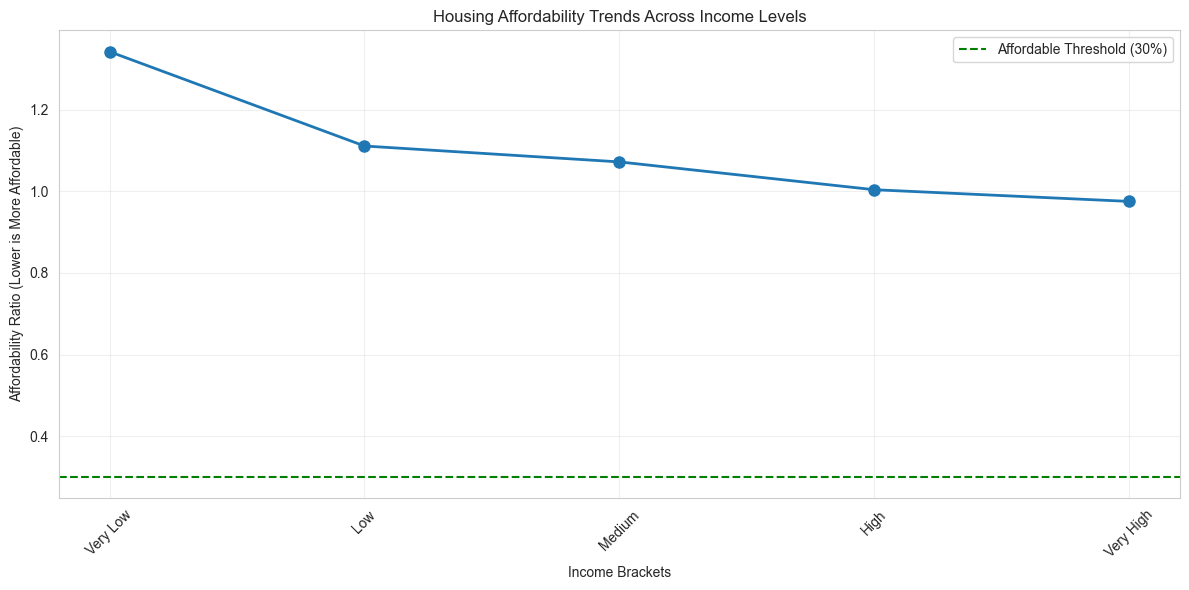

Sample median_income values: 0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: median_income, dtype: float64
Sample rent values: 0    7350.057228
1    5821.907902
2    5717.974260
3    5542.586239
4    5557.201908
Name: estimated_rent_2025_recent, dtype: float64
Median income: $4
Median rent: $2,918


In [23]:
#calculate how affordable housing changes across different income levels
housing_df['income_bracket'] = pd.qcut(housing_df['median_income'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
housing_df['affordability_ratio'] = housing_df['estimated_rent_2025_recent'] * 12 / (housing_df['median_income'] * 10000)

# Group by income bracket and get average affordability ratio
affordability_trend = housing_df.groupby('income_bracket', observed=False)['affordability_ratio'].mean()

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(range(len(affordability_trend)), affordability_trend.values, 
         marker='o', linewidth=2, markersize=8)
plt.title('Housing Affordability Trends Across Income Levels')
plt.xlabel('Income Brackets')
plt.ylabel('Affordability Ratio (Lower is More Affordable)')
plt.xticks(range(len(affordability_trend)), affordability_trend.index, rotation=45)
plt.axhline(y=0.3, color='green', linestyle='--', label='Affordable Threshold (30%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Sample median_income values: {housing_df['median_income'].head()}")
print(f"Sample rent values: {housing_df['estimated_rent_2025_recent'].head()}")
print(f"Median income: ${housing_df['median_income'].median():,.0f}")
print(f"Median rent: ${housing_df['estimated_rent_2025_recent'].median():,.0f}")


# The analysis shows that affordability worsens sharply for lower-income groups, as their rent-to-income ratios exceed the 30% threshold
### In contrast, higher-income households remain well below this line, meaning they spend a smaller share of income on rent.
### This confirms that affordability challenges are most acute for very low- and middle-income earners, while upper-income households experience relatively manageable housing costs.

## This analysis of California's housing market reveals a severe affordability crisis that fundamentally disconnects minimum wage employment from basic housing security. The data demonstrates a strong correlation between population density and housing costs, creating a paradox where job opportunities concentrate in the least affordable areas. Most critically, the rental distribution analysis shows that with most housing priced between $1,500-$2,500 monthly while the affordable threshold sits at only $857, the vast majority of California's rental market remains financially inaccessible to minimum wage earners.
## The employment requirements analysis revealed the most alarming finding: many California regions require individuals to maintain multiple minimum wage jobs simply to afford median rent. This represents more than a statistical concern—it reflects a fundamental breakdown where full-time legal wages cannot secure basic shelter. The geographic disparities identified suggest that workers face impossible choices: accept substandard housing, endure costly long-distance commutes, or leave the state despite available employment opportunities.
## The evidence conclusively demonstrates that California's housing affordability crisis transcends simple market dynamics to become a question of social equity and economic sustainability. The severity of the crisis, where full-time work fails to provide access to adequate housing, demands comprehensive interventions addressing both housing supply and wage adequacy. Without decisive action to bridge the gap between earning capacity and housing costs, California risks transforming from a land of opportunity into a region accessible only to the affluent, threatening the diverse workforce that drives its economic success.